In [1]:
# STEP 0: Import libraries
!pip install -q scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature import local_binary_pattern
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (12, 4)

In [3]:
# STEP 1: Load images & basic info

base_path = "image-data/"

image_files = {
    "cat":   "cat.jfif",
    "banana": "banana.jfif",
    "batik": "batik.jfif
}

images_rgb = {}

for label, fname in image_files.items():
    path = base_path + fname
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        print(f"[ERROR] Gambar {fname} tidak ditemukan.")
        continue

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images_rgb[label] = img_rgb

    print(f"\n=== {label.upper()} ===")
    print("Path:", path)
    print("Shape (H, W, C):", img_rgb.shape)
    print("Sample 3x3 pixels (RGB):")
    print(img_rgb[:3, :3, :])  # contoh kecil

    plt.imshow(img_rgb)
    plt.title(f"Original - {label}")
    plt.axis('off')
    plt.show()

SyntaxError: unterminated string literal (detected at line 8) (ipython-input-1540854358.py, line 8)

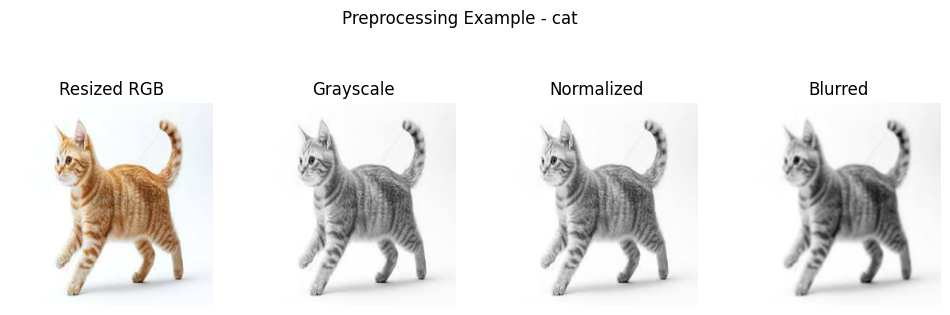

In [ ]:
# STEP 2: Preprocessing function

def preprocess_image(img_rgb, size=(256, 256)):
    # Resize
    img_resized = cv2.resize(img_rgb, size)
    # Grayscale
    gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
    # Normalization 0-1
    norm = gray / 255.0
    # Smoothing / Noise reduction (Gaussian Blur)
    blur = cv2.GaussianBlur(norm, (5, 5), 0)

    return {
        "resized_rgb": img_resized,
        "gray": gray,
        "norm": norm,
        "blur": blur
    }

# Demo untuk satu gambar (misalnya kucing)
sample_label = "cat"
prep = preprocess_image(images_rgb[sample_label])

plt.figure(figsize=(12,4))
titles = ["Resized RGB", "Grayscale", "Normalized", "Blurred"]
imgs = [prep["resized_rgb"], prep["gray"], prep["norm"], prep["blur"]]

for i in range(4):
    plt.subplot(1,4,i+1)
    if i == 0:
        plt.imshow(imgs[i])
    else:
        plt.imshow(imgs[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.suptitle(f"Preprocessing Example - {sample_label}")
plt.show()


=== CAT ===
Path: image-data/cat.jfif
Shape: (183, 275, 3)
Sample pixel matrix:
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


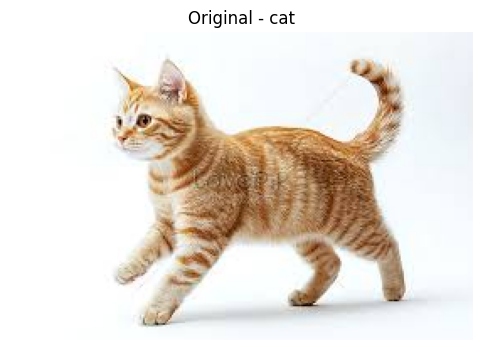


=== BANANA ===
Path: image-data/banana.jfif
Shape: (198, 255, 3)
Sample pixel matrix:
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


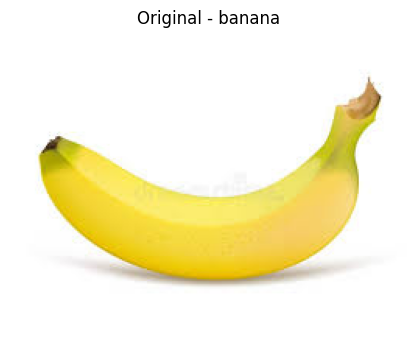


=== BATIK ===
Path: image-data/batik.jfif
Shape: (225, 225, 3)
Sample pixel matrix:
[[[132 104 100]
  [129  91  90]
  [113  54  60]]

 [[ 92  50  52]
  [140  90  93]
  [122  56  66]]

 [[151  80  94]
  [171  97 110]
  [125  44  61]]]


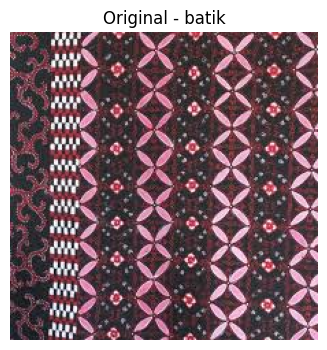


=== ORANGE ===
Path: image-data/orange.jpeg
Shape: (219, 230, 3)
Sample pixel matrix:
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


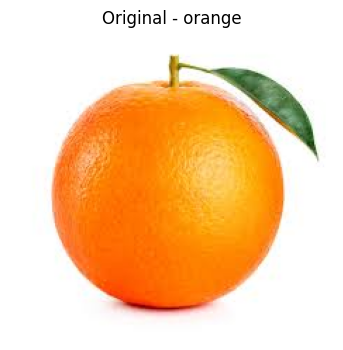


=== RABBIT ===
Path: image-data/rabbit.webp
Shape: (784, 719, 3)
Sample pixel matrix:
[[[238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]]]


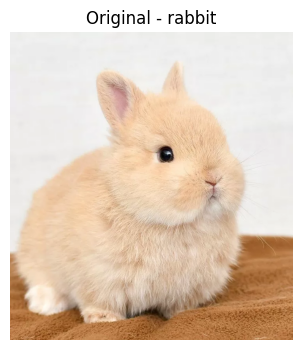

In [ ]:
# STEP 1: Read all images
images_rgb = {}

for label, fname in image_files.items():
    img_bgr = cv2.imread(base_path + fname)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images_rgb[label] = img_rgb

    print(f"\n=== {label.upper()} ===")
    print("Path:", base_path + fname)
    print("Shape:", img_rgb.shape)
    print("Sample pixel matrix:")
    print(img_rgb[:3, :3, :])   # tampilkan 3x3 pixel

    plt.imshow(img_rgb)
    plt.title(f"Original - {label}")
    plt.axis('off')
    plt.show()

In [ ]:
# STEP 2: Preprocessing function

def preprocess_image(img_rgb, size=(256,256)):
    # Resize
    resized = cv2.resize(img_rgb, size)

    # Grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)

    # Normalization (0–1)
    norm = gray / 255.0

    # Noise Reduction (Gaussian Blur)
    blur = cv2.GaussianBlur(norm, (5,5), 0)

    return {
        "resized_rgb": resized,
        "gray": gray,
        "norm": norm,
        "blur": blur
    }


=== PREPROCESSING RESULT for CAT ===
Gray shape: (256, 256)
Normalized min/max: 0.03529411764705882 1.0


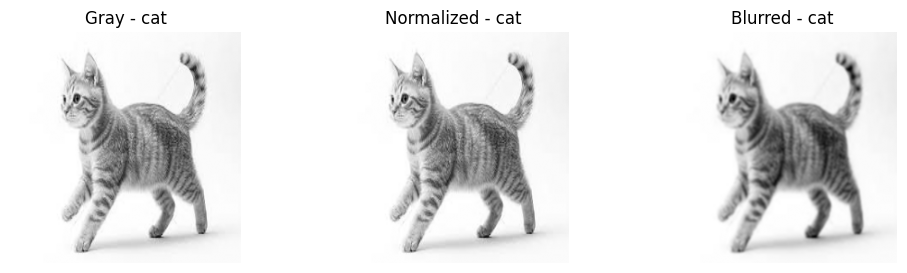


=== PREPROCESSING RESULT for BANANA ===
Gray shape: (256, 256)
Normalized min/max: 0.1450980392156863 1.0


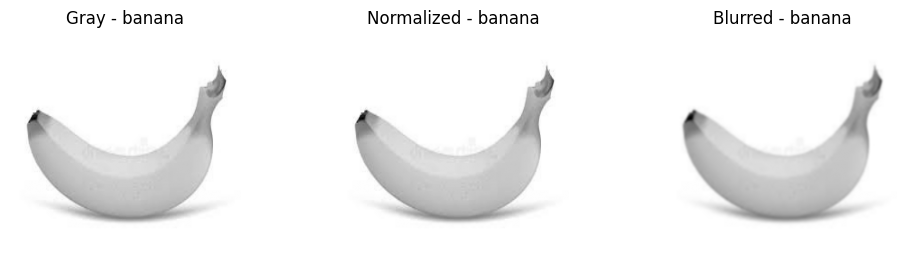


=== PREPROCESSING RESULT for BATIK ===
Gray shape: (256, 256)
Normalized min/max: 0.06666666666666667 0.996078431372549


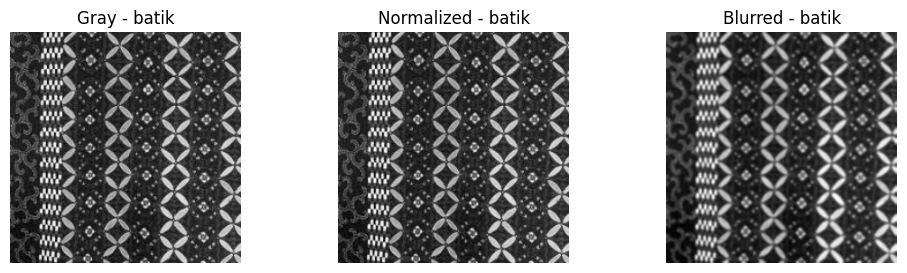


=== PREPROCESSING RESULT for ORANGE ===
Gray shape: (256, 256)
Normalized min/max: 0.14901960784313725 1.0


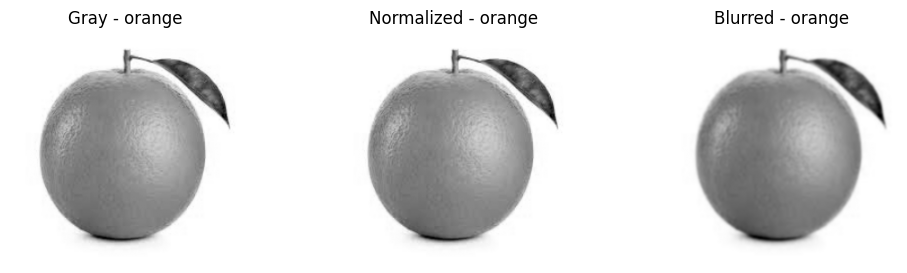


=== PREPROCESSING RESULT for RABBIT ===
Gray shape: (256, 256)
Normalized min/max: 0.01568627450980392 0.9882352941176471


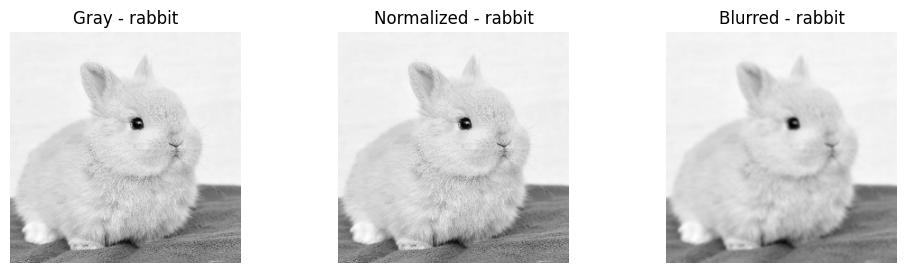

In [ ]:
# STEP 2b: Apply preprocessing to ALL images

preprocessed = {}

for label, img in images_rgb.items():
    preprocessed[label] = preprocess_image(img)

    gray = preprocessed[label]["gray"]
    norm = preprocessed[label]["norm"]
    blur = preprocessed[label]["blur"]

    print(f"\n=== PREPROCESSING RESULT for {label.upper()} ===")
    print("Gray shape:", gray.shape)
    print("Normalized min/max:", norm.min(), norm.max())

    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title(f"Gray - {label}"); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(norm, cmap='gray'); plt.title(f"Normalized - {label}"); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(blur, cmap='gray'); plt.title(f"Blurred - {label}"); plt.axis('off')
    plt.show()

In [ ]:
print("Before blur min/max:", norm.min(), norm.max())
print("After blur  min/max:", blur.min(), blur.max())

Before blur min/max: 0.01568627450980392 0.9882352941176471
After blur  min/max: 0.050474877450980386 0.9785232843137255


In [ ]:
print("Normalized sample:\n", norm[100:105, 100:105])
print("Blurred sample:\n", blur[100:105, 100:105])

Normalized sample:
 [[0.87058824 0.85882353 0.85490196 0.83921569 0.84313725]
 [0.87058824 0.8627451  0.85882353 0.82745098 0.84705882]
 [0.8745098  0.85882353 0.84705882 0.83921569 0.83921569]
 [0.85882353 0.85098039 0.85490196 0.80392157 0.76862745]
 [0.85490196 0.84313725 0.84313725 0.81176471 0.81176471]]
Blurred sample:
 [[0.87028186 0.86651348 0.86078431 0.85595895 0.85507047]
 [0.86905637 0.86170343 0.85220588 0.84431679 0.84208027]
 [0.86744792 0.85787377 0.84586397 0.83399203 0.82809436]
 [0.86288297 0.8528799  0.84004289 0.82533701 0.81675858]
 [0.85689338 0.84820772 0.83765319 0.82608762 0.82077206]]


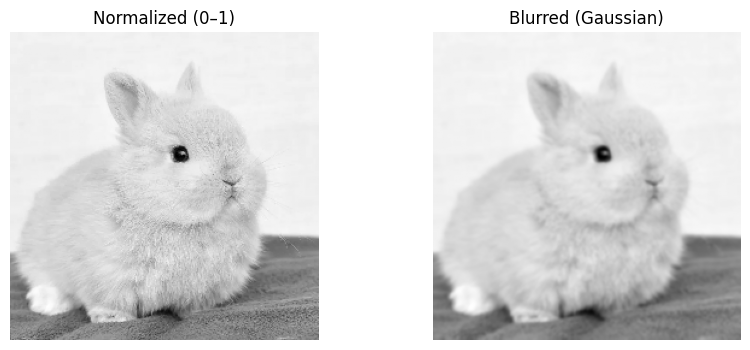

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(norm, cmap='gray'); plt.title("Normalized (0–1)"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(blur, cmap='gray'); plt.title("Blurred (Gaussian)"); plt.axis('off')
plt.show()

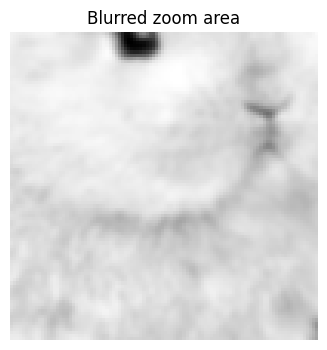

In [ ]:
plt.imshow(blur[100:200, 100:200], cmap='gray')
plt.title("Blurred zoom area")
plt.axis('off')
plt.show()

Feature vector length (cat): 65642
First 20 features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


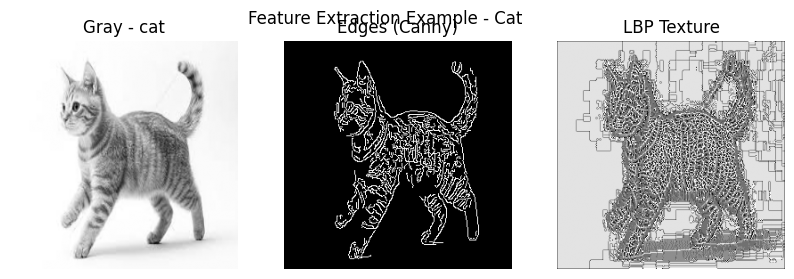

In [ ]:
# STEP 3: Feature extraction function
# - Edge (Canny) -> flatten
# - Texture (LBP) -> histogram
# - Color histogram (RGB) -> 32 bins per channel

def extract_features(img_rgb):
    # Preprocess dulu
    prep = preprocess_image(img_rgb)
    gray = prep["gray"]
    resized_rgb = prep["resized_rgb"]

    # 1) Edge features (Canny)
    edges = cv2.Canny(gray, 100, 200)  # 0/255
    edge_vector = edges.flatten().astype(np.float32) / 255.0  # skala 0-1

    # 2) Texture features (LBP)
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')
    # histogram LBP
    n_bins = int(lbp.max() + 1)
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)

    # 3) Color histogram (RGB)
    chans = cv2.split(resized_rgb)
    color_hists = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [32], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        color_hists.append(hist)
    color_feature = np.concatenate(color_hists)

    # Gabungkan semua fitur menjadi satu vektor
    feature_vector = np.concatenate([edge_vector, lbp_hist, color_feature])

    return {
        "prep": prep,
        "edges": edges,
        "lbp": lbp,
        "feature_vector": feature_vector
    }

# Demo feature extraction untuk kucing
demo = extract_features(images_rgb["cat"])

print("Feature vector length (cat):", len(demo["feature_vector"]))
print("First 20 features:", demo["feature_vector"][:20])

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(demo["prep"]["gray"], cmap='gray')
plt.title("Gray - cat")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(demo["edges"], cmap='gray')
plt.title("Edges (Canny)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(demo["lbp"], cmap='gray')
plt.title("LBP Texture")
plt.axis('off')

plt.suptitle("Feature Extraction Example - Cat")
plt.show()

In [ ]:
# STEP 4: Build feature table (structured data)

feature_list = []
labels = []

for label, img_rgb in images_rgb.items():
    result = extract_features(img_rgb)
    fv = result["feature_vector"]
    feature_list.append(fv)
    labels.append(label)

X = np.vstack(feature_list)  # shape: (n_images, n_features)
y = np.array(labels)

print("X shape (n_samples, n_features):", X.shape)
print("y:", y)

# Buat DataFrame (kolom diberi nama f1, f2, dst)
feature_names = [f"f{i+1}" for i in range(X.shape[1])]
df_features = pd.DataFrame(X, columns=feature_names)
df_features["label"] = y

df_features.head()

X shape (n_samples, n_features): (5, 65642)
y: ['cat' 'banana' 'batik' 'orange' 'rabbit']


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f65634,f65635,f65636,f65637,f65638,f65639,f65640,f65641,f65642,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013168,0.014192,0.014460,0.019337,0.019337,0.020020,0.024824,0.063621,0.992208,cat
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003696,0.003287,0.003803,0.004727,0.005028,0.006553,0.009583,0.024945,0.995288,banana
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.061027,0.061078,0.055942,0.048288,0.039829,0.024522,0.014955,0.012236,0.011581,batik
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004539,0.004625,0.005135,0.005759,0.006582,0.010129,0.015604,0.038216,0.904361,orange
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.143443,0.064778,0.025215,0.018712,0.018628,0.047786,0.850797,0.139289,0.000000,rabbit


In [ ]:
# STEP 5: Simple KNN classification (just for illustration)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred = knn.predict(X)

print("True labels:     ", y)
print("Predicted labels:", y_pred)

True labels:      ['cat' 'banana' 'batik' 'orange' 'rabbit']
Predicted labels: ['cat' 'banana' 'batik' 'orange' 'rabbit']


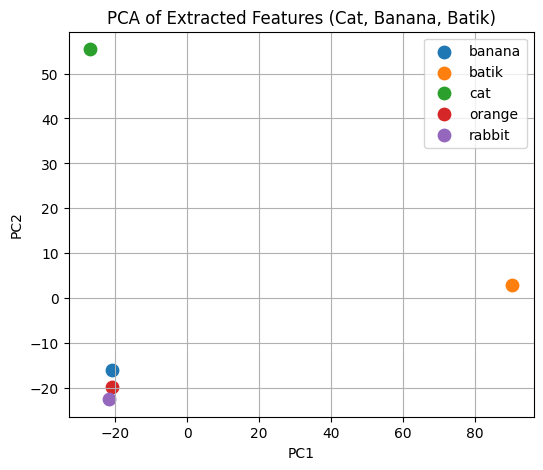

In [ ]:
# STEP 6: PCA 2D visualization

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(6,5))
for label in np.unique(y):
    idx = (y == label)
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label=label, s=80)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Extracted Features (Cat, Banana, Batik)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# STEP 3: Feature extraction function
# - Edge (Canny) -> flatten
# - Texture (LBP) -> histogram
# - Color histogram (RGB) -> 32 bins per channel

def extract_features(img_rgb):
    # Preprocess dulu
    prep = preprocess_image(img_rgb)
    gray = prep["gray"]
    resized_rgb = prep["resized_rgb"]

    # 1) Edge features (Canny)
    edges = cv2.Canny(gray, 100, 200)  # 0/255
    edge_vector = edges.flatten().astype(np.float32) / 255.0  # skala 0-1

    # 2) Texture features (LBP)
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')
    # histogram LBP
    n_bins = int(lbp.max() + 1)
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)

    # 3) Color histogram (RGB)
    chans = cv2.split(resized_rgb)
    color_hists = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [32], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        color_hists.append(hist)
    color_feature = np.concatenate(color_hists)

    # Gabungkan semua fitur menjadi satu vektor
    feature_vector = np.concatenate([edge_vector, lbp_hist, color_feature])

    return {
        "prep": prep,
        "edges": edges,
        "lbp": lbp,
        "feature_vector": feature_vector
    }

In [ ]:
# STEP 3b: Apply extract_features to ALL images

features_dict = {}   # simpan hasil per gambar

for label, img_rgb in images_rgb.items():
    res = extract_features(img_rgb)
    features_dict[label] = res

    fv = res["feature_vector"]
    print(f"\n=== {label.upper()} ===")
    print("Feature vector length:", len(fv))
    print("First 20 features:", fv[:20])


=== CAT ===
Feature vector length: 65642
First 20 features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

=== BANANA ===
Feature vector length: 65642
First 20 features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

=== BATIK ===
Feature vector length: 65642
First 20 features: [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]

=== ORANGE ===
Feature vector length: 65642
First 20 features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

=== RABBIT ===
Feature vector length: 65642
First 20 features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


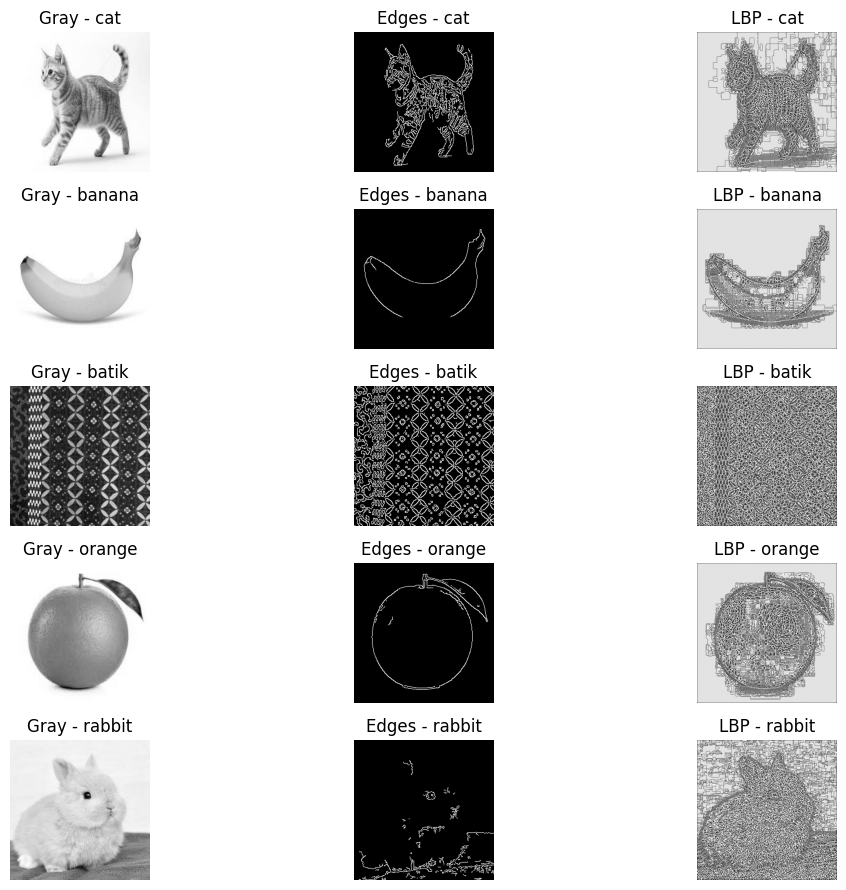

In [ ]:
plt.figure(figsize=(12,9))

labels = list(features_dict.keys())

for i, label in enumerate(labels):
    res = features_dict[label]

    plt.subplot(len(labels), 3, 3*i + 1)
    plt.imshow(res["prep"]["gray"], cmap='gray')
    plt.title(f"Gray - {label}")
    plt.axis('off')

    plt.subplot(len(labels), 3, 3*i + 2)
    plt.imshow(res["edges"], cmap='gray')
    plt.title(f"Edges - {label}")
    plt.axis('off')

    plt.subplot(len(labels), 3, 3*i + 3)
    plt.imshow(res["lbp"], cmap='gray')
    plt.title(f"LBP - {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
feature_list = []
labels = []

for label, res in features_dict.items():
    feature_list.append(res["feature_vector"])
    labels.append(label)

X = np.vstack(feature_list)
y = np.array(labels)

print("X shape:", X.shape)
print("y:", y)

X shape: (5, 65642)
y: ['cat' 'banana' 'batik' 'orange' 'rabbit']


In [ ]:
# STEP 4: Build feature table (structured data)

feature_list = []
labels = []

for label, img_rgb in images_rgb.items():
    result = extract_features(img_rgb)
    fv = result["feature_vector"]
    feature_list.append(fv)
    labels.append(label)

X = np.vstack(feature_list)  # shape: (n_images, n_features)
y = np.array(labels)

print("X shape (n_samples, n_features):", X.shape)
print("y:", y)

# Buat DataFrame penuh di Python
feature_names = [f"f{i+1}" for i in range(X.shape[1])]
df_features = pd.DataFrame(X, columns=feature_names)
df_features["label"] = y

print("\nDataFrame full (hanya ditampilkan 5 kolom pertama):")
display(df_features.iloc[:, :5].head())

# ==== SIMPAN KE EXCEL: HANYA SEBAGIAN FITUR ====

# misal: hanya simpan 1000 fitur pertama + label
max_features_to_export = 1000

n_features_actual = X.shape[1]
n_export = min(max_features_to_export, n_features_actual)

export_feature_cols = [f"f{i+1}" for i in range(n_export)]

df_export = df_features[export_feature_cols + ["label"]]

print("\nShape df_export (untuk Excel):", df_export.shape)

output_path = "image_features_cat_banana_batik.xlsx"
df_export.to_excel(output_path, index=False)

print("File Excel tersimpan di:", output_path)

X shape (n_samples, n_features): (5, 65642)
y: ['cat' 'banana' 'batik' 'orange' 'rabbit']

DataFrame full (hanya ditampilkan 5 kolom pertama):


,f1,f2,f3,f4,f5
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0



Shape df_export (untuk Excel): (5, 1001)
File Excel tersimpan di: image_features_cat_banana_batik.xlsx
